# 第3章データを統計量で記述する

In [1]:
%matplotlib inline

In [4]:
# 平均値 mean
def calc_mean(numbers):
    s = sum(numbers)
    N = len(numbers)
    return s / N

if __name__ == '__main__':
    donations = [100, 60, 70, 900, 100, 200, 500, 500, 503, 600, 1000, 1200]
    mean = calc_mean(donations)
    N = len(donations)
    print('Mean donation over the last {0} days is {1}'.format(N, mean))

Mean donation over the last 12 days is 477.75


In [5]:
# 中央値 median

def calc_median(numbers):
    N = len(numbers)
    numbers = sorted(numbers)
    
    if N % 2 ==0:
        m1 = int(N / 2) - 1
        m2 = m1 + 1
        return (numbers[m1] + numbers[m2]) / 2
    else :
        m = (N+1) / 2 - 1
        return numbers[m]

if __name__ == '__main__':
    donations = [100, 60, 70, 900, 100, 200, 500, 500, 503, 600, 1000, 1200]
    median = calc_median(donations)
    N = len(donations)
    print('Median donation over the last {0} days is {1}'.format(N, median))

Median donation over the last 12 days is 500.0


In [8]:
# 最頻値 mode

simplelist = [4,2,1,3,4]
from collections import Counter
c = Counter(simplelist)
c.most_common()

[(4, 2), (1, 1), (2, 1), (3, 1)]

In [10]:
simplelist = [4,2,1,3,4]
from collections import Counter
c = Counter(simplelist)
c.most_common(1)

[(4, 2)]

In [6]:
from collections import Counter

def calc_mode(numbers):
    c = Counter(numbers)
    mode = c.most_common(1)
    return mode[0][0]

if __name__ == '__main__':
    scores = [7,8,9,2,10,9,9,9,9,4,5,6,1,5,6,7,8,6,1,10]
    mode = calc_mode(scores)
    print('The mode of the list of numbers is: {0}'.format(mode))

The mode of the list of numbers is: 9


In [7]:
# 度数分布表

from collections import Counter

def calc_frequency(numbers):
    c = Counter(numbers)
    numbers_freq = c.most_common()
    numbers_freq = sorted(numbers_freq)
    return numbers_freq

if __name__ == '__main__':
    scores = [7,8,9,2,10,9,9,9,9,4,5,6,1,5,6,7,8,6,1,10]
    freq = calc_frequency(scores)
    print('Number\tFrequency') 
    for number in freq:
        print('{0}\t{1}'.format(number[0], number[1]))


Number	Frequency
1	2
2	1
4	1
5	2
6	3
7	2
8	2
9	5
10	2


In [8]:
# 散らばり dispersion

def find_range(numbers):
    lowest = min(numbers)
    highest = max(numbers)
    r = highest - lowest
    return lowest, highest, r

if __name__ == '__main__':
    donations = [100, 60, 70, 900, 100, 200, 500, 500, 503, 600, 1000, 1200]
    lowest, highest, r = find_range(donations)
    print('Lowest: {0} Highest: {1} Range: {2}'.format(lowest, highest, r))


Lowest: 60 Highest: 1200 Range: 1140


In [9]:
# 分散 variance と 標準偏差 standard deviation

def calc_variance(numbers):
    mean = calc_mean(numbers)
    N = len(numbers)
    return sum(map(lambda x: (x - mean) ** 2, numbers)) / N
    
    
if __name__ == '__main__':
    donations = [100, 60, 70, 900, 100, 200, 500, 500, 503, 600, 1000, 1200]
    v = calc_variance(donations)
    print('The variance of the list of numbers is {0}'.format(v))
    std = v**0.5
    print('The standard deviation of the list of numbers is {0}'.format(std))

The variance of the list of numbers is 141047.35416666666
The standard deviation of the list of numbers is 375.5627166887931


In [10]:
# ピアソンの相関係数

simple_list1 = [1,2,3]
simple_list2 = [4,5,6]
for x, y in zip(simple_list1, simple_list2):
    print(x,y)

1 4
2 5
3 6


In [11]:
def calc_correlation(xs, ys):
    n = min(len(xs), len(ys))
    numer = sum(map(lambda x, y: x*y, xs, ys)) * n - sum(xs) * sum(ys)
    denom = ((n * sum(map(lambda x: x**2, xs)) - sum(xs) ** 2) * (n * sum(map(lambda y: y**2, ys)) - sum(ys) ** 2)) ** 0.5
    return numer / denom

if __name__ == '__main__':
    simple_list1 = [1,2,3]
    simple_list2 = [4,5,6]
    calc_correlation(simple_list1, simple_list2)
    

In [12]:
def xxx(xs, ys):
    return list(map(lambda x, y: x * y, xs, ys))

if __name__ == '__main__':
    simple_list1 = [1,2,3]
    simple_list2 = [4,5,6]
    xxx(simple_list1, simple_list1)

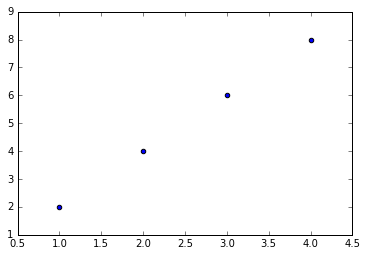

In [23]:
x = [1,2,3,4]
y = [2,4,6,8]

import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.show()

In [13]:
def sum_data(filename):
    s = 0
    with open(filename) as f:
        for line in f:
            s = s + float(line)
        print('Sum of the numbers: {0}'.format(s))
        
if __name__ == '__main__':
    sum_data("chap03/mydata.txt")

Sum of the numbers: 5733.0


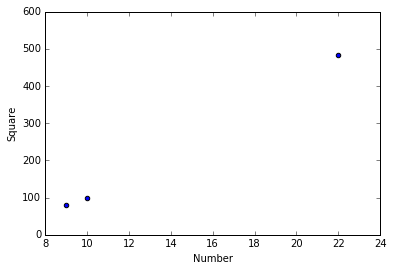

In [14]:
import csv
import matplotlib.pyplot as plt

def scatter_plot(x, y):
    plt.scatter(x, y)
    plt.xlabel('Number')
    plt.ylabel('Square')
    plt.show()

def read_csv(filename):
    numbers = []
    squared = []
    with open(filename) as f:
        reader = csv.reader(f)
        next(reader)
        for row in reader:
            numbers.append(int(row[0]))
            squared.append(int(row[1]))
    return numbers, squared


if __name__ == '__main__':
    numbers, squared = read_csv("chap03/numbers.csv")
    scatter_plot(numbers, squared)

### プログラミングチャレンジ

In [15]:
# 3.1
def calc_correlation(xs, ys):
    nxs = len(xs)
    nys = len(ys)
    if nxs != nys:
        raise Exception("length of each list in arguments must be the same. first is '{0}', second is '{1}'".format(nxs, nys))
    n = nxs
    numer = sum(map(lambda x, y: x*y, xs, ys)) * n - sum(xs) * sum(ys)
    denom = ((n * sum(map(lambda x: x**2, xs)) - sum(xs) ** 2) * (n * sum(map(lambda y: y**2, ys)) - sum(ys) ** 2)) ** 0.5
    return numer / denom


if __name__ == '__main__':
    calc_correlation([], [1])

Exception: length of each list in arguments must be the same. first is '0', second is '1'

In [33]:
# 3.2 関数電卓の実装 (だるいのでパス)


In [3]:
# 3.3 他のCSVデータで遊ぶ
import csv
import datetime
import matplotlib.pyplot as plt

def read_csv(filename):
    values = []
    dates = []
    with open(filename) as f:
        reader = csv.reader(f)
        next(reader)
        for row in reader:
            dates.append(datetime.datetime.strptime(row[0], "%Y-%m-%d"))
            values.append(float(row[1]))
    return dates, values

def calc_diffs(dates, values):
    years = []
    diffs = []
    idx = 0
    while idx < len(dates) - 1:
        years.append(dates[idx].year)
        diffs.append(values[idx] - values[idx + 1])
        idx += 1
    return years, diffs


if __name__ == '__main__':
    dates, values = read_csv("chap03/WORLDBANK-USA_SP_POP_TOTL.csv")
    years, diffs = calc_diffs(dates, values)
    mean = calc_mean(diffs)
    median = calc_median(diffs)
    v = calc_variance(values)
    std = v ** 0.5
    correlation = calc_correlation(years, diffs)
    print('Mean of diff {0}'.format(mean))
    print('Median of diffs {0}'.format(median))
    print('Variance of diffs {0}, standard deviation of diffs {1}'.format(v, std))
    print('Correlation of diffs and years {0}'.format(correlation))

    plt.scatter(years, diffs)
    plt.xlabel('Year')
    plt.ylabel('Diff')
    plt.show()

NameError: name 'calc_mean' is not defined

In [53]:
# 微妙に正の相関がある？くらいな感じかな

In [2]:
# 3.4 百分位を求める

def read_data(filename):
    data = []
    with open(filename) as f:
        for line in f:
            data.append(float(line))
    return data


def calc_percentile(numbers, p):
    sorted_numbers = sorted(numbers)
    n = len(sorted_numbers)
    i = n * p / 100 + 0.5
    if int(i) == i:
        return sorted_numbers[int(i) - 1]
    else:
        integer_part = int(i)
        fractional_part = i - integer_part
        return (1 - fractional_part) * sorted_numbers[integer_part - 1] + fractional_part * sorted_numbers[integer_part]
if __name__ == '__main__':
    numbers = read_data("chap03/mydata.txt")
    print(calc_percentile(numbers, 90))
    some_data = [5, 1, 9, 3, 14, 9, 7]
    print(calc_percentile(some_data, 50))
    print(calc_percentile(some_data, 25))


1060.0000000000002
7
3.5


In [68]:
# 3.5 はパス